<a href="https://colab.research.google.com/github/Katrin-Leberfinger/Hybrid-gender-debiased-music-recommendation/blob/main/001_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 36.3 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 86 kB 3.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW
from torch import nn
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Read Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Master\ Thesis/data

/content/drive/MyDrive/Master Thesis/data


In [5]:
data_tracks_lyrics = pd.read_csv("music/data_tracks_lyrics.txt", sep="\t").drop(['Unnamed: 0'],axis=1).dropna()
data_tracks_tags_lyrics = pd.read_csv("music/data_tracks_tags_lyrics.txt", sep="\t").drop(['Unnamed: 0'],axis=1).dropna().drop_duplicates('track_id')
data_bio = pd.read_csv("music/data_artists_biography.txt", sep=",").drop(['Unnamed: 0'],axis=1).dropna()
data_interaction = pd.read_csv("music/data_user_track_interaction_old.txt", sep="\t").drop(['Unnamed: 0'],axis=1)

data_tracks_tags_lyrics = data_tracks_tags_lyrics.merge(data_bio)
data_interaction = data_interaction.merge(data_tracks_tags_lyrics[['track_id']].drop_duplicates(), on = 'track_id', how = 'inner').drop_duplicates()
data_tracks_tags_lyrics = data_tracks_tags_lyrics.merge(data_interaction[['track_id']], on = 'track_id', how = 'inner').drop_duplicates()

data_user = pd.read_csv("music/data_user.txt", sep="\t").drop(['Unnamed: 0'],axis=1)

In [6]:
# data_movies = pd.read_csv("movies/movies_abstracts.csv").drop(['Unnamed: 0'],axis=1).dropna()
# data_interaction = pd.read_csv("movies/ratings.csv").drop(['timestamp'],axis=1)

# data_movies = pd.merge(data_movies, data_interaction[['movieId']], 'inner').drop_duplicates()
# data_interaction = pd.merge(data_interaction, data_movies[['movieId']], 'inner')

# data_movies.columns = ['track_id', 'lyrics_cleaned', 'tags', 'abstract']
# data_tracks_tags_lyrics = data_movies

# data_interaction.columns = ['user_id', 'track_id', 'count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


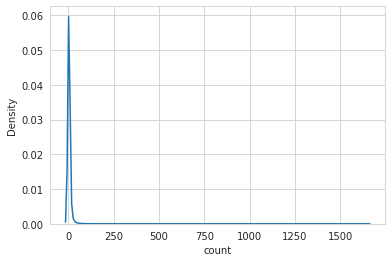

In [7]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(data_interaction['count'], bw=0.5)

In [8]:
data_interaction_plot = data_interaction

In [9]:
# filter out playcount 1
data_interaction = data_interaction[data_interaction['count'] != 1]

#data_interaction.loc[data_interaction['count']<2., 'count'] = 0.
data_interaction.loc[data_interaction['count']>=2., 'count'] = 1.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [10]:
# data_interaction.loc[data_interaction['count']<4., 'count'] = 0.
# data_interaction.loc[data_interaction['count']>=4., 'count'] = 1.

In [11]:
# filter out users with too little playcount
df_per_users = data_interaction.groupby(['user_id']).size().reset_index(name='counts')
users = df_per_users[df_per_users['counts'] >= 5]['user_id'].values
data_interaction = data_interaction[data_interaction['user_id'].isin(users)]

In [12]:
# filter out tracks with too little playcount
df_per_track = data_interaction.groupby(['track_id']).size().reset_index(name='counts')
tracks = df_per_track[df_per_users['counts'] >= 5]['track_id'].values
data_interaction = data_interaction[data_interaction['track_id'].isin(tracks)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## CV and balance data set

In [13]:
# add negative samples
import random
random.seed(123)
data_interaction_new = pd.DataFrame(columns = data_interaction.columns)
for user_id,df in data_interaction.groupby('user_id'):
  n_diff = len(df[df['count'] == 1]) - len(df[df['count'] == 0])
  if n_diff > 1:
    df_tmp = df.merge(data_interaction[['track_id']], how = 'right')
    neg_list = random.sample(list(df_tmp[np.isnan(df_tmp.user_id)].track_id.values), n_diff)
    df_neg = pd.DataFrame({'user_id': user_id, 'track_id':neg_list, 'count':0})
    data_interaction_new=data_interaction_new.append(df)
    data_interaction_new=data_interaction_new.append(df_neg)
  else:
    data_interaction_new = data_interaction_new.append(df)

data_interaction_new = shuffle(data_interaction_new)

In [14]:
# data_interaction_new = data_interaction
# data_interaction_new = shuffle(data_interaction_new)

In [15]:
data_interaction_new = data_interaction_new.merge(data_tracks_tags_lyrics[['track_id', 'lyrics_cleaned', 'tags', 'abstract']]).drop_duplicates()

In [16]:
data_tracks_tags_lyrics = data_tracks_tags_lyrics.merge(data_interaction_new[['track_id']]).drop_duplicates()

In [17]:
# rating_col = 'count'
# item_col = 'track_id'
# user_col = 'user_id'
# data_items_eval = data_tracks_tags_lyrics

In [18]:
np.random.seed(123)
data_interaction_new['fold'] = np.random.randint(1, 6, data_interaction_new.shape[0])

In [33]:
test_fold = 1
val_fold = 2

data_interaction_train = data_interaction_new.loc[((data_interaction_new.fold != test_fold) & (data_interaction_new.fold != val_fold)), ['user_id', 'track_id', 'count', 'lyrics_cleaned', 'tags', 'abstract']]
data_interaction_test = data_interaction_new.loc[data_interaction_new.fold == test_fold, ['user_id', 'track_id', 'count', 'lyrics_cleaned', 'tags', 'abstract']]
data_interaction_val = data_interaction_new.loc[data_interaction_new.fold == val_fold,  ['user_id', 'track_id', 'count', 'lyrics_cleaned', 'tags', 'abstract']]

In [22]:
len(data_interaction_test)

42459

In [34]:
# itermin solution (maybe change later)
selected_user = []
data_interaction_test_new = pd.DataFrame()
for user_id,df in data_interaction_test.groupby('user_id'):
  if df['count'].sum() >= 6:
  
    df_tmp = df.merge(data_tracks_tags_lyrics[['track_id']].drop_duplicates(), how = 'right').drop_duplicates()
    items_to_ignore = data_interaction_train[(data_interaction_train['user_id'] == user_id) & (data_interaction_train['count'] == 1)]['track_id'].values
    df_tmp = df_tmp[~df_tmp['track_id'].isin(items_to_ignore)]
    neg_list = list(set(df_tmp.loc[df_tmp.isna().any(axis=1),].track_id.values))
    df_neg = pd.DataFrame({'user_id': user_id, 'track_id':neg_list, 'count':0})
    data_interaction_test_new=data_interaction_test_new.append(df_neg)
    selected_user.append(user_id)
  
data_interaction_test = data_interaction_test_new
data_interaction_test = data_interaction_test[['user_id', 'track_id', 'count']].merge(data_tracks_tags_lyrics[['track_id', 'lyrics_cleaned', 'tags', 'abstract']], on = 'track_id', how = 'left').drop_duplicates()
data_interaction_test = data_interaction_test.loc[(data_interaction_test.user_id.isin(selected_user))]
data_interaction_test = shuffle(data_interaction_test)

In [35]:
len(data_interaction_test)

997345

In [36]:
dir = "preprocessed_data/"

In [ ]:
data_interaction.to_csv(dir + 'data_interaction.csv', encoding = 'utf-8-sig') 
data_tracks_tags_lyrics.to_csv(dir + 'data_tracks_tags_lyrics.csv', encoding = 'utf-8-sig') 

data_interaction_test.to_csv(dir + 'data_interaction_test.csv', encoding = 'utf-8-sig') 
data_interaction_train.to_csv(dir + 'data_interaction_train.csv', encoding = 'utf-8-sig') 
data_interaction_val.to_csv(dir + 'data_interaction_val.csv', encoding = 'utf-8-sig') 

# Visualize data

(array([0.67455589, 0.8116496 , 0.87176028, 0.90546668, 0.92719959,
        0.9418804 , 0.95254301, 0.96045777, 0.96671704, 0.97152356,
        0.97549219, 0.97857566, 0.98116811, 0.98316369, 0.98488674,
        0.98631923, 0.98774047, 0.98887565, 0.98997254, 0.99082393,
        0.99162802, 0.99223165, 0.99283303, 0.99340738, 0.99394343,
        0.99435787, 0.99473626, 0.99511916, 0.99545476, 0.99571153,
        0.99598857, 0.99624533, 0.99640976, 0.99659895, 0.99678139,
        0.99694582, 0.997126  , 0.99728367, 0.99743683, 0.99759449,
        0.99771612, 0.99780621, 0.99790982, 0.99801568, 0.99812154,
        0.99823191, 0.99829272, 0.99836479, 0.99844363, 1.        ]),
 array([  1.  ,   2.98,   4.96,   6.94,   8.92,  10.9 ,  12.88,  14.86,
         16.84,  18.82,  20.8 ,  22.78,  24.76,  26.74,  28.72,  30.7 ,
         32.68,  34.66,  36.64,  38.62,  40.6 ,  42.58,  44.56,  46.54,
         48.52,  50.5 ,  52.48,  54.46,  56.44,  58.42,  60.4 ,  62.38,
         64.36,  66.34,  68.32

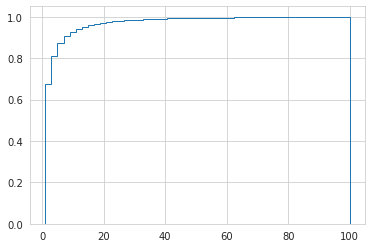

In [ ]:
data_interaction_plot.loc[data_interaction_plot['count']>=100., 'count'] = 100.
plt.hist(data_interaction_plot['count'], 50, density=True, histtype='step', cumulative=True)

(array([0.08950677, 0.22794737, 0.39010953, 0.53004083, 0.70743405,
        0.76524726, 0.80854236, 0.84256919, 0.89150301, 0.90848402,
        0.92151144, 0.93343703, 0.95151987, 0.95728822, 0.96286214,
        0.9666213 , 0.97381554, 0.97686175, 0.97964871, 0.98224123,
        0.98593558, 0.98749109, 0.98924104, 0.99014842, 0.99112062,
        0.99280576, 0.99338907, 0.99410202, 0.99455571, 0.99526865,
        0.99559272, 0.99604641, 0.99643528, 0.99656491, 0.99682416,
        0.99714823, 0.99760192, 0.99786117, 0.99805561, 0.99831486,
        0.99831486, 0.99844449, 0.99857411, 0.99863893, 0.99863893,
        0.99876855, 0.99883337, 0.99909262, 0.99915743, 0.99922224,
        0.99935187, 0.99941668, 0.99941668, 0.9994815 , 0.99954631,
        0.99954631, 0.99967593, 0.99967593, 0.99967593, 0.99967593,
        0.99967593, 0.99974075, 0.99974075, 0.99974075, 0.99980556,
        0.99980556, 0.99980556, 0.99980556, 0.99980556, 0.99980556,
        0.99980556, 0.99980556, 0.99980556, 0.99

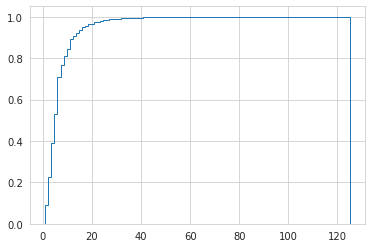

In [ ]:
data_interaction_plot_per_user = data_interaction.groupby(['user_id']).size().reset_index(name='counts')
plt.hist(data_interaction_plot_per_user['counts'], 100, density=True, histtype='step', cumulative=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7faf48f1a3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7faf48f23250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faf48f27a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faf48f27290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faf48f0e0d0>,
  <matplotlib.lines.Line2D at 0x7faf48f0e890>]}

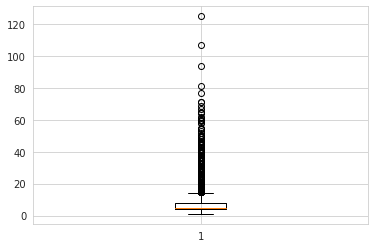

In [ ]:
plt.boxplot(data_interaction_plot_per_user['counts'])

In [ ]:
data_interaction_plot_per_user[['counts']].describe()

,counts
count,15429.000000
mean,6.976343
std,5.999408
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,125.000000


# Data statistics

In [ ]:
# Unique numbers
print("Unique users: ", len(data_interaction.user_id.unique()))
print("Unique tracks: ", len(data_interaction.track_id.unique()))
print("Unique artists: ", len(data_tracks_tags_lyrics.track_artist.unique()))
print("Listening events: ", len(data_interaction))


Unique users:  15429
Unique tracks:  2724
Unique artists:  1906
Listening events:  107638


In [ ]:
# User gender split
data_all_info = pd.read_csv("music/data_all_info.txt", sep="\t").drop(['Unnamed: 0'],axis=1)
data_user = pd.read_csv("data_user.txt", sep="\t").drop(['Unnamed: 0'],axis=1)
data_user.columns = ['user_id', 'gender_user']
data_interaction.merge(data_user)[['user_id', 'gender_user']].drop_duplicates()[['gender_user']].value_counts()

gender_user
m              12102
f               3327
dtype: int64

In [ ]:
# Artist gender split
data_interaction.merge(data_all_info)[['track_artist', 'gender_artist']].drop_duplicates()[['gender_artist']].value_counts()

gender_artist
male             1401
female            505
dtype: int64

In [ ]:
# Artist gender split in listening events
data_interaction.merge(data_all_info)[['gender_artist']].value_counts()


gender_artist
male             85315
female           26654
dtype: int64

In [ ]:
data_interaction.merge(data_all_info)[['gender_artist']].value_counts() / len(data_interaction)

gender_artist
male             0.792610
female           0.247626
dtype: float64

In [ ]:
# User gender vs artist gender in listening events
df = data_interaction.merge(data_all_info).merge(data_user)
df.gender_artist.groupby([df.gender_user, df.gender_artist]).count()

gender_user  gender_artist
f            female            7077
             male             13381
m            female           19577
             male             71934
Name: gender_artist, dtype: int64

In [ ]:
df[['gender_user']].value_counts()

gender_user
m              91511
f              20458
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of listening events per user gender')

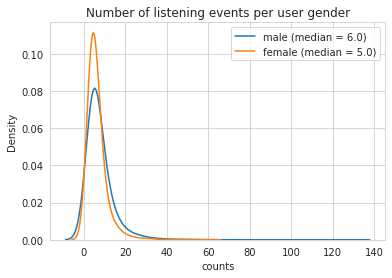

In [ ]:
# Plot: Distribution of listening events per artist gender (x-axis number of listening events, y-axis number of tracks, split up by gender)
df_female = df[df.gender_user == "f"]
df_female = df_female.groupby(['user_id']).size().reset_index(name='counts')
df_male = df[df.gender_user == "m"]
df_male = df_male.groupby(['user_id']).size().reset_index(name='counts')
sns.kdeplot(df_male['counts'], bw=0.5, label=f"male (median = {df_male['counts'].median()})")
sns.kdeplot(df_female['counts'], bw=0.5, label=f"female (median = {df_female['counts'].median()})")
plt.legend()
plt.title("Number of listening events per user gender")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of listening events per artist gender')

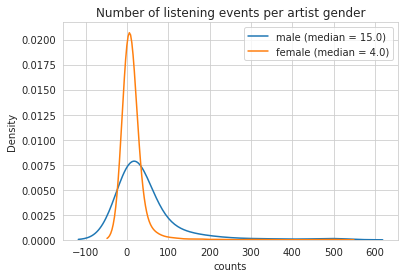

In [ ]:
df_female = df[df.gender_user == "f"]
df_female = df_female.groupby(['track_artist']).size().reset_index(name='counts')
df_female.loc[df_female['counts']>500, 'counts'] = 500
df_male = df[df.gender_user == "m"]
df_male = df_male.groupby(['track_artist']).size().reset_index(name='counts')
df_male.loc[df_male['counts']>500, 'counts'] = 500
sns.kdeplot(df_male['counts'], bw=0.5, label=f"male (median = {df_male['counts'].median()})")
sns.kdeplot(df_female['counts'], bw=0.5, label=f"female (median = {df_female['counts'].median()})")
plt.legend()
plt.title("Number of listening events per artist gender")